Notebbok ilustrativo sobre o Trabalho III. Abaixo temos resultados empíricos sobre o exemplo do trabalho. Em cada simulação ocorre a mudança na razão $\frac{\beta_0}{\alpha_0}$. A simulação foi feita de forma similar ao exemplo dado por Lucas Moschen em monitoria, sendo que aproveitei a função draw_samples do notebook mostrado por ele.

In [1]:
import numpy as np 
from scipy.stats import norm, gamma, t
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def draw_samples(alpha0, beta0, lambda0, mu0, seed = 1000000):

    r = np.random.RandomState(seed)
    tau = r.gamma(shape = alpha0, scale = 1/beta0, size = 100000)
    mu = r.normal(mu0, scale = np.sqrt(1/(lambda0*tau)))

    return mu, tau

A partir daqui temos as contas dos quatro casos feitos no Trabalho III.

# 1ª Forma

In [3]:
alpha0 = 4
beta0 = 1
mu0 = 10
varmu = 3.965226
lambda0 = beta0/(varmu*(alpha0 - 1))
print("lambda0:", lambda0)

xbar = 8.307849
n = 10
sn = 7.930452

lambda1 = lambda0 + n
mu1 = (lambda0*mu0 + n*xbar)/(lambda0 + n)
alpha1 = alpha0 + n/2
beta1 = beta0 + sn/2 + (n*lambda0*(xbar - mu0)**2)/(2*(n + lambda0))
print("lambda1:", lambda1)
print("mu1:", mu1)
print("alpha1:", alpha1)
print("beta1:", beta1)

lower = mu1 - (beta1/(alpha1*lambda1))**(1/2)*t.ppf(0.5+0.5*0.95, df = 2*alpha1)
upper = mu1 + (beta1/(alpha1*lambda1))**(1/2)*t.ppf(0.5+0.5*0.95, df = 2*alpha1)

(lower, upper)

lambda0: 0.08406414497769694
lambda1: 10.084064144977697
mu1: 8.321955338966417
alpha1: 9.0
beta1: 5.084576277941813


(7.824678461062495, 8.819232216870338)

Note que os valores dos parâmetros acima foram calculados de acordo com as expressões obtidas no trabalho, ou seja, são os valores teóricos, o mesmo valendo para o intervalo de confiança apresentado acima. Já os gráficos abaixo são todos do resultado do experimento. Nas outras simulações o mesmo ocorre.

In [4]:
# para fazer o tikz

print(beta1/(alpha1*lambda1))
print(beta0/(alpha0*lambda0))

0.05602432825188678
2.9739195


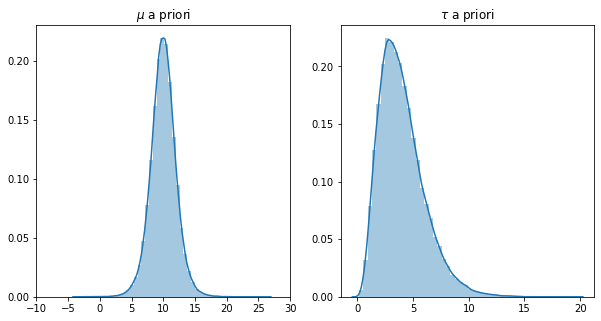

In [5]:
mu_samples, tau_samples = draw_samples(alpha0, beta0, lambda0, mu0)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(mu_samples, ax = ax[0])
sns.distplot(tau_samples, ax = ax[1])
ax[0].set_title(r'$\mu$ a priori')
ax[1].set_title(r'$\tau$ a priori')
ax[0].set_xlim((-10,30))
plt.show()

In [6]:
ci_mu = (np.quantile(mu_samples, 0.025), np.quantile(mu_samples, 0.975))
print(ci_mu)

(6.011045356965342, 14.00101070925777)


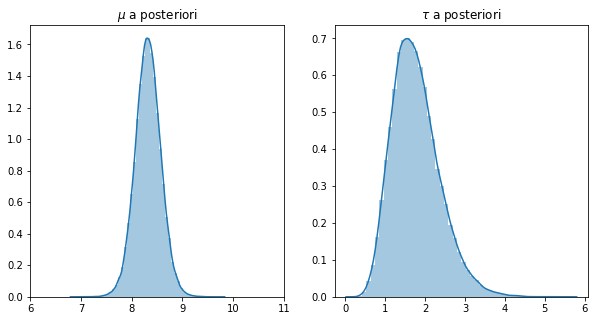

In [7]:
mu_samples_post, tau_samples_post = draw_samples(alpha1, beta1, lambda1, mu1)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(mu_samples_post, ax = ax[0])
sns.distplot(tau_samples_post, ax = ax[1])
ax[0].set_title(r'$\mu$ a posteriori')
ax[1].set_title(r'$\tau$ a posteriori')
ax[0].set_xlim((6,11))
plt.show()

In [8]:
ci_mu = (np.quantile(mu_samples_post, 0.025), np.quantile(mu_samples_post, 0.975))
print(ci_mu)

(7.831055548615051, 8.817799105441226)


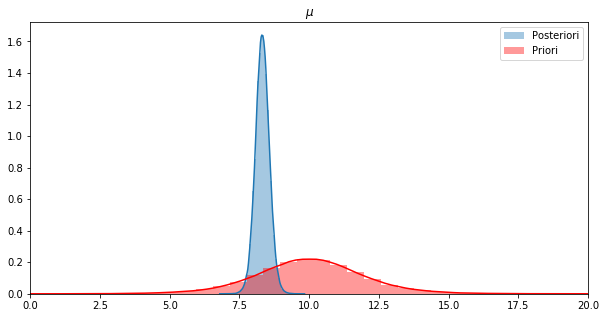

In [9]:
fig, ax = plt.subplots(figsize = (10,5))
sns.distplot(mu_samples_post, ax = ax, kde = True, label = 'Posteriori')
sns.distplot(mu_samples, ax = ax, kde = True, label = 'Priori', color = 'red')
ax.set_title(r'$\mu$')
ax.set_xlim((0,20))
ax.legend()
plt.show()

# 2ª Forma

In [10]:
alpha0 = 25
beta0 = 1
mu0 = 10
varmu = 3.965226
lambda0 = beta0/(varmu*(alpha0 - 1))
print("lambda0:", lambda0)

xbar = 8.307849
n = 10
sn = 7.930452

lambda1 = lambda0 + n
mu1 = (lambda0*mu0 + n*xbar)/(lambda0 + n)
alpha1 = alpha0 + n/2
beta1 = beta0 + sn/2 + (n*lambda0*(xbar - mu0)**2)/(2*(n + lambda0))
print("lambda1:", lambda1)
print("mu1:", mu1)
print("alpha1:", alpha1)
print("beta1:", beta1)

lower = mu1 - (beta1/(alpha1*lambda1))**(1/2)*t.ppf(0.5+0.5*0.95, df = 2*alpha1)
upper = mu1 + (beta1/(alpha1*lambda1))**(1/2)*t.ppf(0.5+0.5*0.95, df = 2*alpha1)

(lower, upper)

lambda0: 0.010508018122212118
lambda1: 10.010508018122213
mu1: 8.309625248851837
alpha1: 30.0
beta1: 4.980254406354445


(8.05203362327982, 8.567216874423854)

In [11]:
# para fazer o tikz

print(beta1/(alpha1*lambda1))
print(beta0/(alpha0*lambda0))

0.016583422131153235
3.8066169600000004


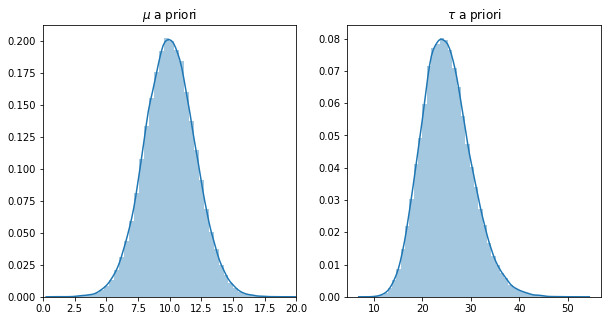

In [12]:
mu_samples, tau_samples = draw_samples(alpha0, beta0, lambda0, mu0)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(mu_samples, ax = ax[0])
sns.distplot(tau_samples, ax = ax[1])
ax[0].set_title(r'$\mu$ a priori')
ax[1].set_title(r'$\tau$ a priori')
ax[0].set_xlim((0,20))
plt.show()

In [13]:
ci_mu = (np.quantile(mu_samples, 0.025), np.quantile(mu_samples, 0.975))
print(ci_mu)

(6.106041402885366, 13.923658570470169)


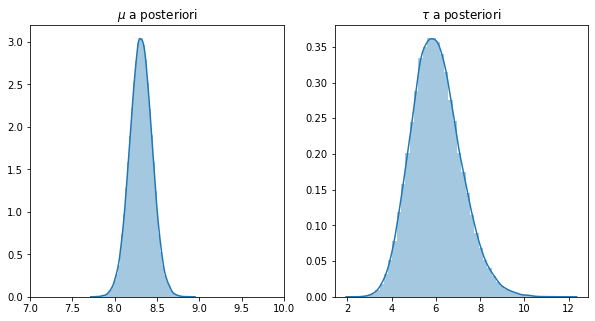

In [14]:
mu_samples_post, tau_samples_post = draw_samples(alpha1, beta1, lambda1, mu1)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(mu_samples_post, ax = ax[0])
sns.distplot(tau_samples_post, ax = ax[1])
ax[0].set_title(r'$\mu$ a posteriori')
ax[1].set_title(r'$\tau$ a posteriori')
ax[0].set_xlim((7,10))
plt.show()

In [15]:
ci_mu = (np.quantile(mu_samples_post, 0.025), np.quantile(mu_samples_post, 0.975))
print(ci_mu)

(8.050640044853855, 8.566811182876766)


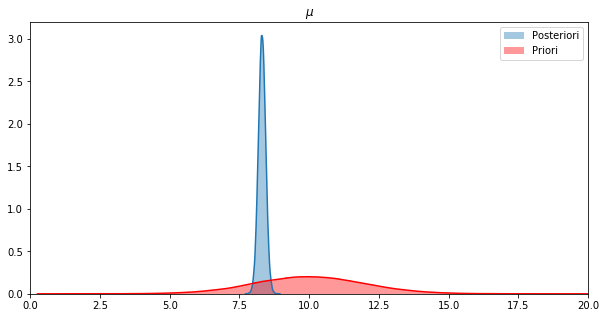

In [16]:
fig, ax = plt.subplots(figsize = (10,5))
sns.distplot(mu_samples_post, ax = ax, kde = True, label = 'Posteriori')
sns.distplot(mu_samples, ax = ax, kde = True, label = 'Priori', color = 'red')
ax.set_title(r'$\mu$')
ax.set_xlim((0,20))
ax.legend()
plt.show()

# 3ª Forma

In [17]:
alpha0 = 200
beta0 = 29
mu0 = 10
varmu = 3.965226
lambda0 = beta0/(varmu*(alpha0 - 1))
print("lambda0:", lambda0)

xbar = 8.307849
n = 10
sn = 7.930452

lambda1 = lambda0 + n
mu1 = (lambda0*mu0 + n*xbar)/(lambda0 + n)
alpha1 = alpha0 + n/2
beta1 = beta0 + sn/2 + (n*lambda0*(xbar - mu0)**2)/(2*(n + lambda0))
print("lambda1:", lambda1)
print("mu1:", mu1)
print("alpha1:", alpha1)
print("beta1:", beta1)

lower = mu1 - (beta1/(alpha1*lambda1))**(1/2)*t.ppf(0.5+0.5*0.95, df = 2*alpha1)
upper = mu1 + (beta1/(alpha1*lambda1))**(1/2)*t.ppf(0.5+0.5*0.95, df = 2*alpha1)

(lower, upper)

lambda0: 0.03675166137215896
lambda1: 10.03675166137216
mu1: 8.314045164121694
alpha1: 205.0
beta1: 33.01765022657346


(8.065026690836966, 8.563063637406422)

In [18]:
# para fazer o tikz

print(beta1/(alpha1*lambda1))
print(beta0/(alpha0*lambda0))

0.016047194735541583
3.94539987


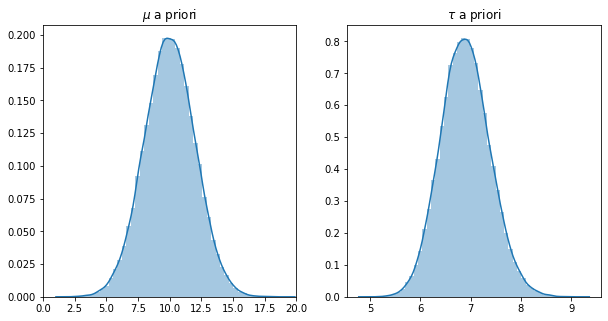

In [19]:
mu_samples, tau_samples = draw_samples(alpha0, beta0, lambda0, mu0)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(mu_samples, ax = ax[0])
sns.distplot(tau_samples, ax = ax[1])
ax[0].set_title(r'$\mu$ a priori')
ax[1].set_title(r'$\tau$ a priori')
ax[0].set_xlim((0,20))
plt.show()

In [20]:
ci_mu = (np.quantile(mu_samples, 0.025), np.quantile(mu_samples, 0.975))
print(ci_mu)

(6.070688638108283, 13.912206364861802)


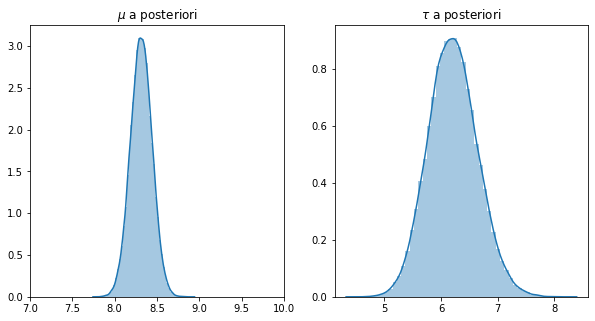

In [21]:
mu_samples_post, tau_samples_post = draw_samples(alpha1, beta1, lambda1, mu1)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(mu_samples_post, ax = ax[0])
sns.distplot(tau_samples_post, ax = ax[1])
ax[0].set_title(r'$\mu$ a posteriori')
ax[1].set_title(r'$\tau$ a posteriori')
ax[0].set_xlim((7,10))
plt.show()

In [22]:
ci_mu = (np.quantile(mu_samples_post, 0.025), np.quantile(mu_samples_post, 0.975))
print(ci_mu)

(8.063409262584402, 8.563555066871857)


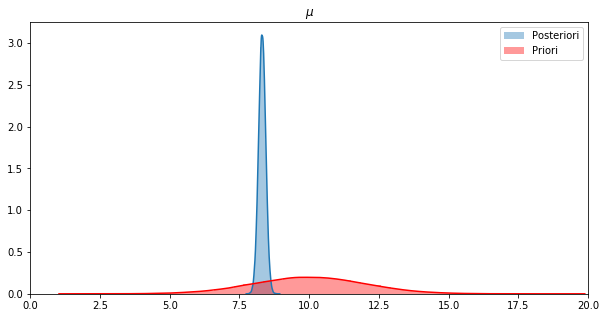

In [23]:
fig, ax = plt.subplots(figsize = (10,5))
sns.distplot(mu_samples_post, ax = ax, kde = True, label = 'Posteriori')
sns.distplot(mu_samples, ax = ax, kde = True, label = 'Priori', color = 'red')
ax.set_title(r'$\mu$')
ax.set_xlim((0,20))
ax.legend()
plt.show()

# 4ª Forma

In [24]:
alpha0 = 10
beta0 = 1
mu0 = 10
varmu = 3.965226
lambda0 = beta0/(varmu*(alpha0 - 1))
print("lambda0:", lambda0)

xbar = 8.307849
n = 10
sn = 7.930452

lambda1 = lambda0 + n
mu1 = (lambda0*mu0 + n*xbar)/(lambda0 + n)
alpha1 = alpha0 + n/2
beta1 = beta0 + sn/2 + (n*lambda0*(xbar - mu0)**2)/(2*(n + lambda0))
print("lambda1:", lambda1)
print("mu1:", mu1)
print("alpha1:", alpha1)
print("beta1:", beta1)

lower = mu1 - (beta1/(alpha1*lambda1))**(1/2)*t.ppf(0.5+0.5*0.95, df = 2*alpha1)
upper = mu1 + (beta1/(alpha1*lambda1))**(1/2)*t.ppf(0.5+0.5*0.95, df = 2*alpha1)

(lower, upper)

lambda0: 0.028021381659232316
lambda1: 10.028021381659233
mu1: 8.312577391293896
alpha1: 15.0
beta1: 5.005231760281796


(7.940037725332982, 8.68511705725481)

In [25]:
# para fazer o tikz

print(beta1/(alpha1*lambda1))
print(beta0/(alpha0*lambda0))

0.033274970669927795
3.5687034


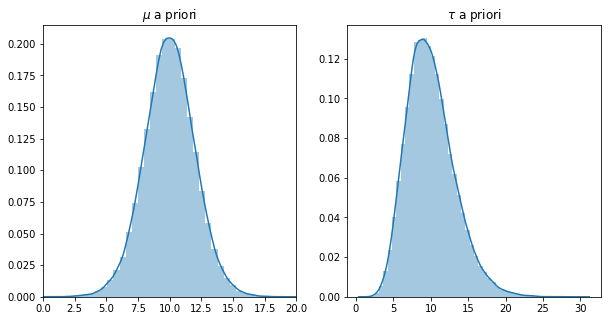

In [26]:
mu_samples, tau_samples = draw_samples(alpha0, beta0, lambda0, mu0)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(mu_samples, ax = ax[0])
sns.distplot(tau_samples, ax = ax[1])
ax[0].set_title(r'$\mu$ a priori')
ax[1].set_title(r'$\tau$ a priori')
ax[0].set_xlim((0,20))
plt.show()

In [27]:
ci_mu = (np.quantile(mu_samples, 0.025), np.quantile(mu_samples, 0.975))
print(ci_mu)

(6.030841537400898, 13.934355206732546)


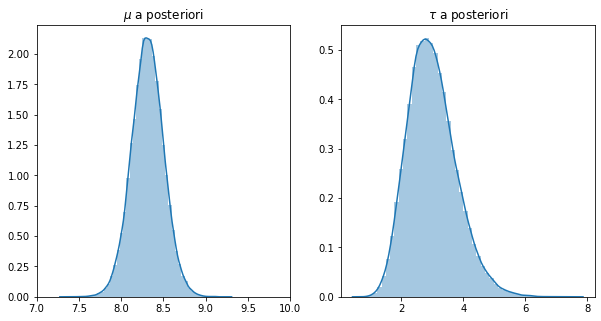

In [28]:
mu_samples_post, tau_samples_post = draw_samples(alpha1, beta1, lambda1, mu1)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(mu_samples_post, ax = ax[0])
sns.distplot(tau_samples_post, ax = ax[1])
ax[0].set_title(r'$\mu$ a posteriori')
ax[1].set_title(r'$\tau$ a posteriori')
ax[0].set_xlim((7,10))
plt.show()

In [29]:
ci_mu = (np.quantile(mu_samples_post, 0.025), np.quantile(mu_samples_post, 0.975))
print(ci_mu)

(7.937892643172084, 8.685704019513237)


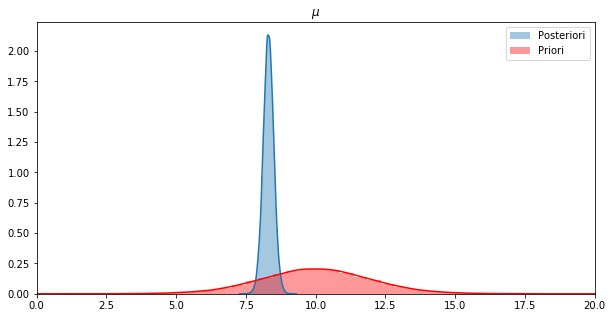

In [30]:
fig, ax = plt.subplots(figsize = (10,5))
sns.distplot(mu_samples_post, ax = ax, kde = True, label = 'Posteriori')
sns.distplot(mu_samples, ax = ax, kde = True, label = 'Priori', color = 'red')
ax.set_title(r'$\mu$')
ax.set_xlim((0,20))
ax.legend()
plt.show()